In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class SimpleLinear:

  def __init__(self, lr = 0.01, n_iters = 1000, max_tolerance = 0.01):
    self.lr = lr
    self.n_iters = n_iters
    self.max_tolerance = max_tolerance
    self.weights = None
    self.bias = None

  def predict(self,data):
    return np.dot(data,self.weights) + self.bias

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (1/n_samples)*np.dot(X.T,(y_pred-y))
      db = (1/n_samples)*np.sum(y_pred-y)

      old_weights = self.weights
      old_bias = self.bias
      self.weights = self.weights - self.lr*dw
      self.bias = self.bias - self.lr*db

      isOptimal = False
      if abs(np.sum(self.weights - old_weights)) <= self.max_tolerance:
        isOptimal = True
      if isOptimal:
        break

  def mse(self, y_pred, y_true):
    return np.mean((y_true-y_pred)**2)

In [3]:
X,y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1234)

In [4]:
slr =SimpleLinear()
slr.fit(X_train, y_train)

In [5]:
y_pred = slr.predict(X_test)

In [6]:
slr.mse(y_pred, y_test)

np.float64(305.391636808288)

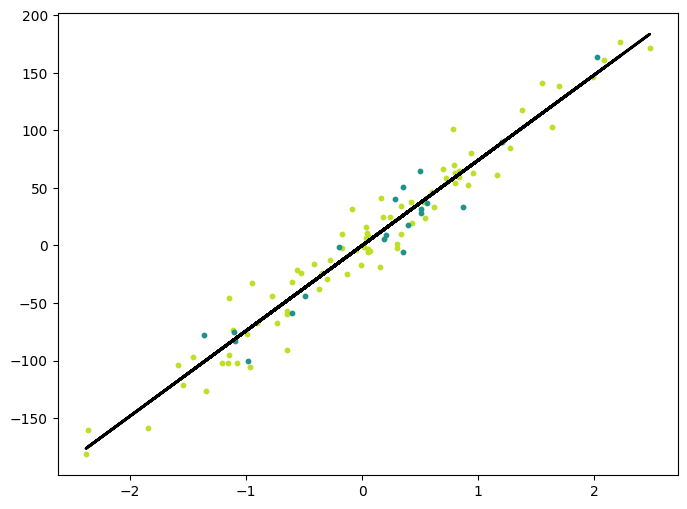

In [7]:
y_pred_line = slr.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s=10)
plt.plot(X, y_pred_line, color = 'black', linewidth=2, label = 'prediction')
plt.show()